In [64]:
#Importing Utilities
import pandas as pd
import numpy as np
#For Preprocessing
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import *
#For Building Model
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import seaborn as sns

In [65]:
df=pd.read_csv('Dataset/dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [66]:
df.shape

(50000, 2)

In [67]:
df = df.rename(columns={'review': 'text'})
df.head()

text sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [68]:
# Check for missing data
df.isnull().sum()

text         0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment'>

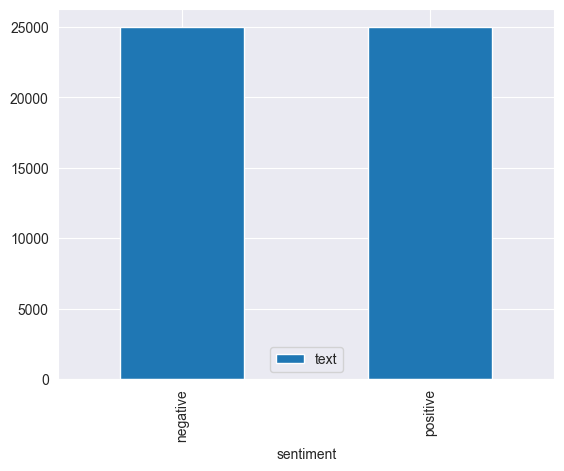

In [69]:
# The distribution of sentiments
df.groupby('sentiment').count().plot(kind='bar')

<Axes: >

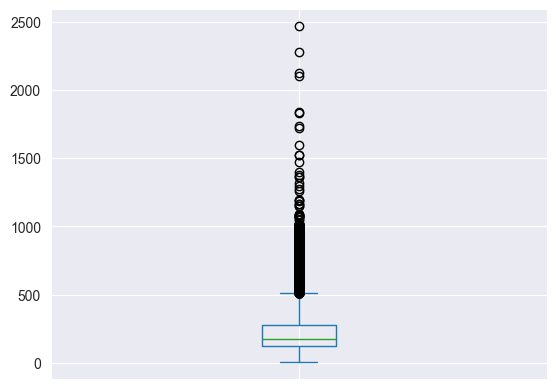

In [70]:
# Calculate text lengths
text_len = pd.Series([len(text.split()) for text in df['text']])
# The distribution of text lengths
text_len.plot(kind='box')

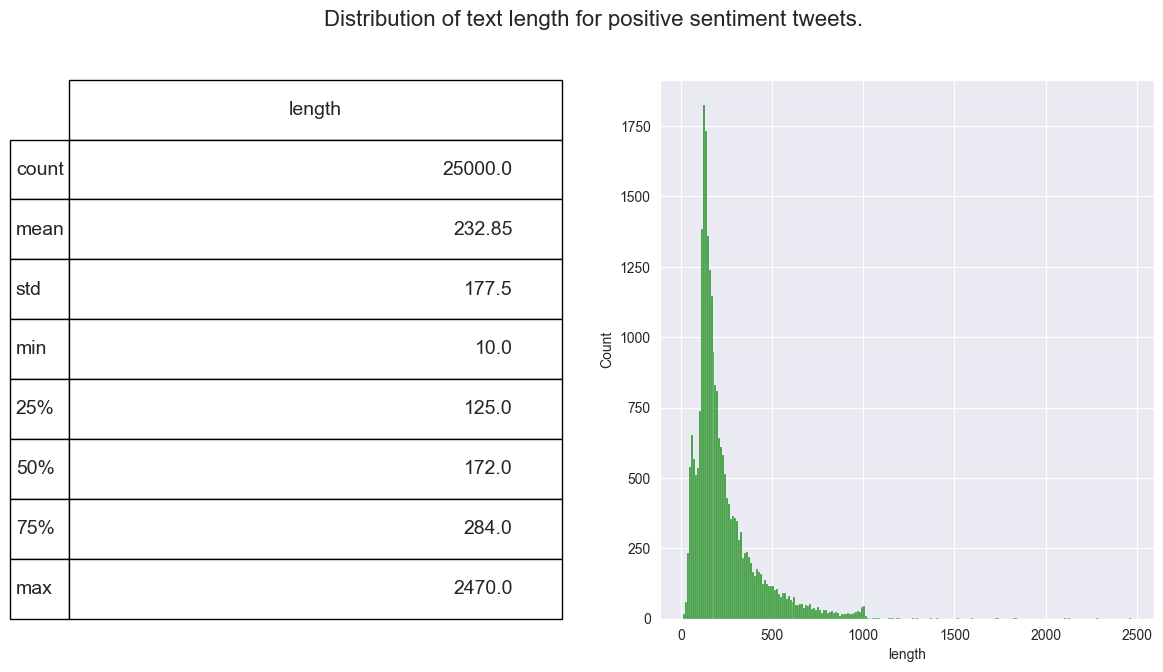

In [71]:
from matplotlib import pyplot as plt
#Plotting the distribution of text length for positive sentiment texts
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='positive']['length'], ax=ax1,color='green')
describe = df.length[df.sentiment=='positive'].describe().to_frame().round(2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)
plt.show()

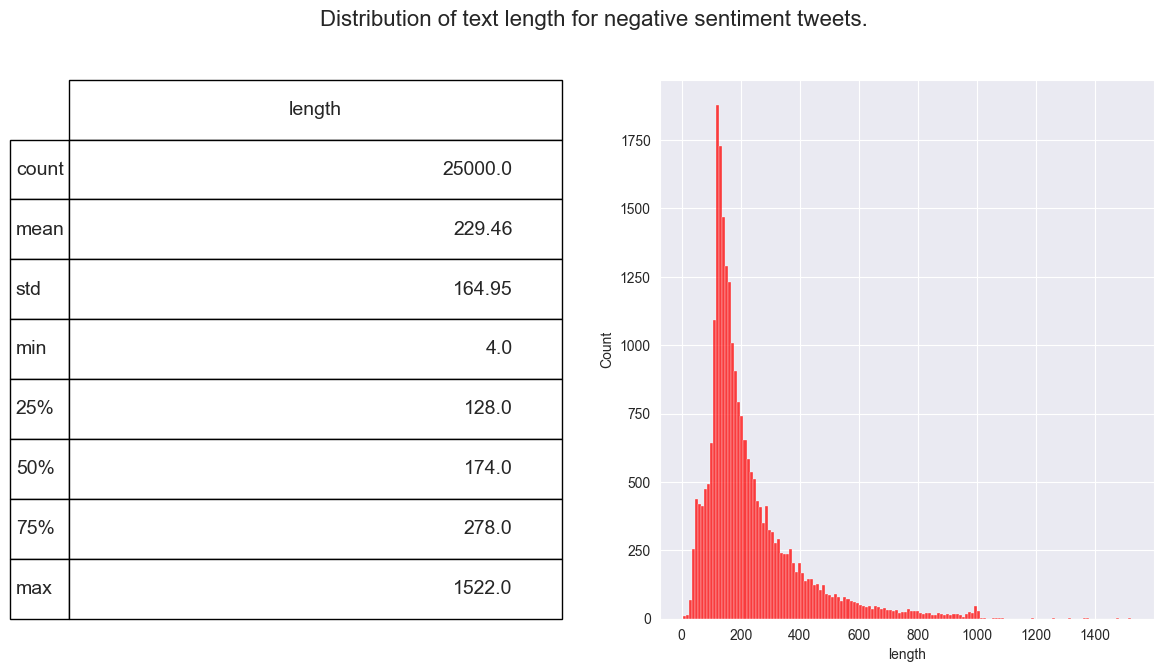

In [72]:
#Plotting the distribution of text length for negative sentiment tweets
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='negative']['length'], ax=ax1,color='red')
describe = df.length[df.sentiment=='negative'].describe().to_frame().round(2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.show()

In [73]:
import plotly.express as px
fig = px.pie(df, names='sentiment', title ='Pie chart of different sentiments of texts')
fig.show()

In [74]:
df.drop(['length'], axis=1, inplace=True)
df.head()

text sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

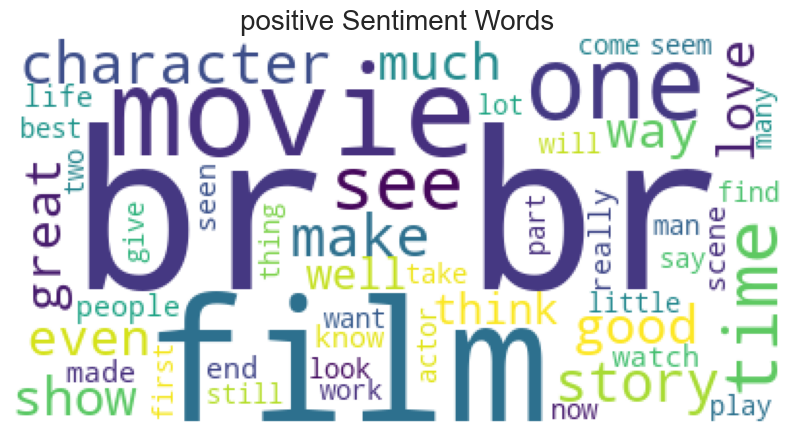

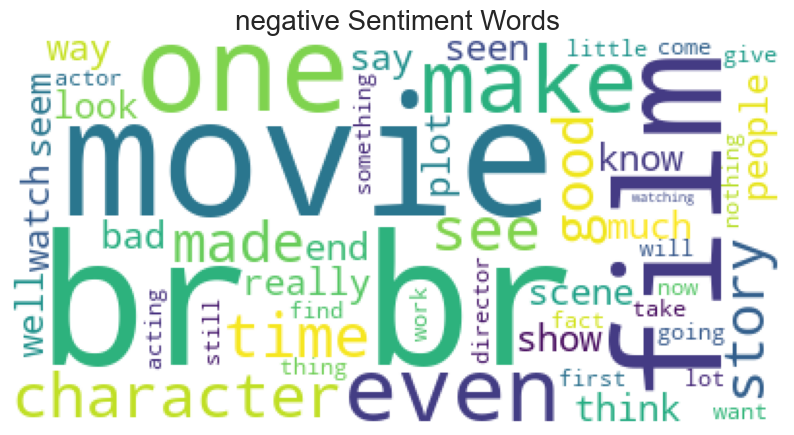

In [75]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df1, category):
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df1[df1.sentiment==category]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive text words
wordcount_gen(df, 'positive')
# Negative text words
wordcount_gen(df, 'negative')

In [76]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tayyab
[nltk_data]     Anees\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
stopwords_list = set(stopwords.words('english'))
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
    
def preprocess_text(text):
    text = text.lower()
    # Remove html tags
    sentence = remove_tags(text)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

In [78]:
X = []
sentences = list(df['text'])
for sen in sentences:
    X.append(preprocess_text(sen))
X[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [79]:
#Label Encoding the Sentiments
y = df['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [81]:
wordTokenizer = Tokenizer()
wordTokenizer.fit_on_texts(X_train)
X_train = wordTokenizer.texts_to_sequences(X_train)
X_test = wordTokenizer.texts_to_sequences(X_test)

In [82]:
import io
import json
# Saving the Tokenizer
tokenizer_json = wordTokenizer.to_json()
with io.open('Helper/dataset_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [83]:
numberWords = len(wordTokenizer.word_index) + 1

In [88]:
# Padding all text to fixed length 120
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [89]:
# Load GloVe word embeddings and create an Embeddings Dictionary
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('Helper/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [90]:
embedding_matrix = zeros((numberWords, 100))
for word, index in wordTokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(92394, 100)

In [92]:
#Making A CNN Modal
from keras.src.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
cnn_model = Sequential()
embedding_layer = Embedding(numberWords, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

C:\Users\Tayyab Anees\OneDrive\Desktop\OR PROJECT\FeelBot\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [95]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (128, 100, 100)        │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (128, 96, 128)         │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ (128, 128)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (128, 1)               │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,303,657 (35.49 MB)

 Trainable params: 64,257 (251.00 KB)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [96]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - acc: 0.7731 - loss: 0.4771 - val_acc: 0.8102 - val_loss: 0.4200
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - acc: 0.8432 - loss: 0.3689 - val_acc: 0.8209 - val_loss: 0.3960
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - acc: 0.8813 - loss: 0.3039 - val_acc: 0.8240 - val_loss: 0.3883
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - acc: 0.9086 - loss: 0.2531 - val_acc: 0.8248 - val_loss: 0.3895
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - acc: 0.9311 - loss: 0.2131 - val_acc: 0.8204 - val_loss: 0.3964
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - acc: 0.9483 - loss: 0.1782 - val_acc: 0.8232 - val_loss: 0.4046


In [97]:
cnn_test = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8198 - loss: 0.3993


In [98]:
print("CNN Test Score:", cnn_test[0])
print("CNN Test Accuracy:", cnn_test[1])

CNN Test Score: 0.39963388442993164
CNN Test Accuracy: 0.819599986076355


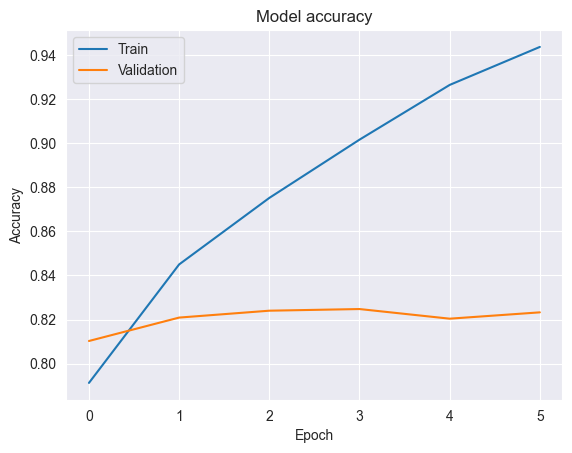

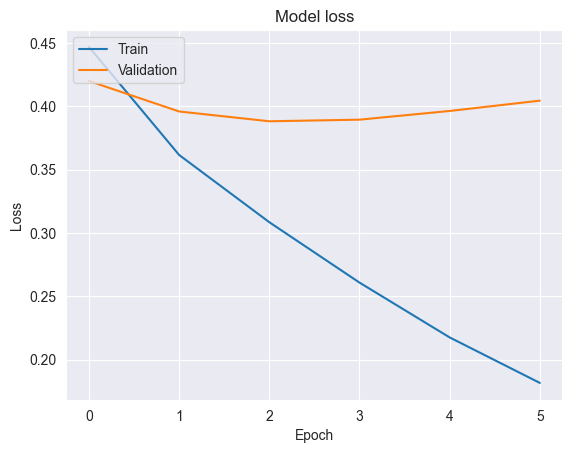

In [109]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


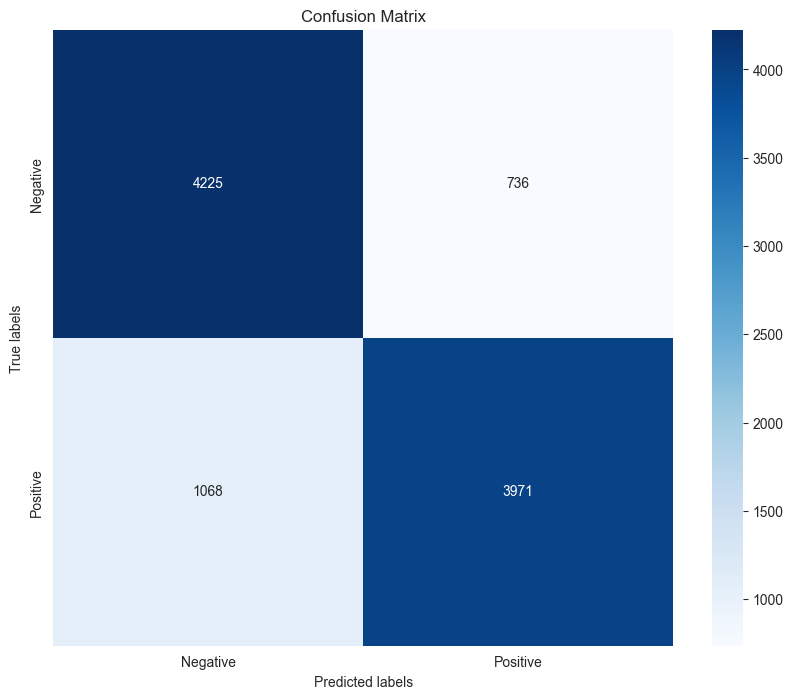

In [111]:
from sklearn.metrics import confusion_matrix
class_labels = ['Negative', 'Positive']
y_pred = cnn_model.predict(X_test)
y_pred = (y_pred > 0.5)
CR=confusion_matrix(y_test, y_pred)
# Create confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(CR, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [126]:
from keras_visualizer import visualizer
visualizer(cnn_model, file_name='graph', file_format=None, settings=None)

AttributeError: 'Embedding' object has no attribute 'input_shape'

In [140]:
#LSTM MODAL
from keras.layers import LSTM
# Neural Network architecture
lstm_model = Sequential()
embedding_layer = Embedding(numberWords, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

C:\Users\Tayyab Anees\OneDrive\Desktop\OR PROJECT\FeelBot\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [143]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (128, 100, 100)        │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (128, 128)             │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (128, 1)               │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,356,777 (35.69 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [144]:
# Model Training
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - acc: 0.7573 - loss: 0.5085 - val_acc: 0.7949 - val_loss: 0.4709
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - acc: 0.7966 - loss: 0.4496 - val_acc: 0.8090 - val_loss: 0.4272
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - acc: 0.8112 - loss: 0.4191 - val_acc: 0.8260 - val_loss: 0.3921
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - acc: 0.8318 - loss: 0.3839 - val_acc: 0.8284 - val_loss: 0.3792
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - acc: 0.8459 - loss: 0.3527 - val_acc: 0.8202 - val_loss: 0.3932
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - acc: 0.8539 - loss: 0.3403 - val_acc: 0.8301 - val_loss: 0.3967


In [145]:
lstm_test = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", lstm_test[0])
print("Test Accuracy:", lstm_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - acc: 0.8272 - loss: 0.4088
Test Score: 0.4067075848579407
Test Accuracy: 0.8259999752044678


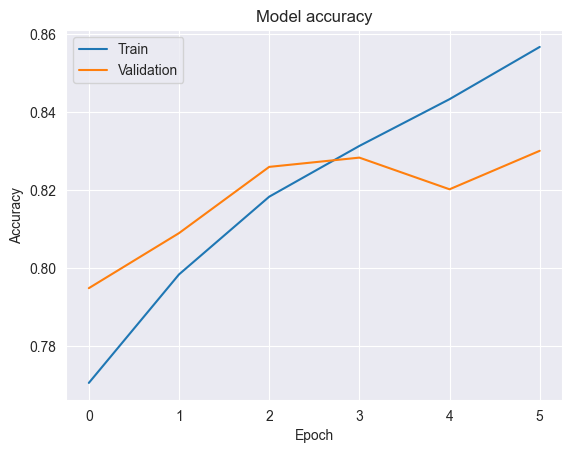

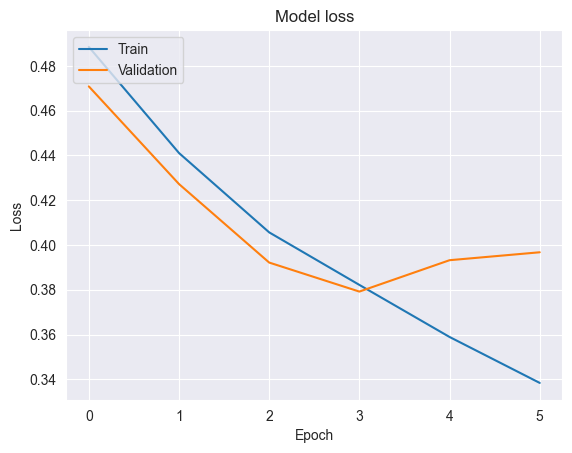

In [146]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


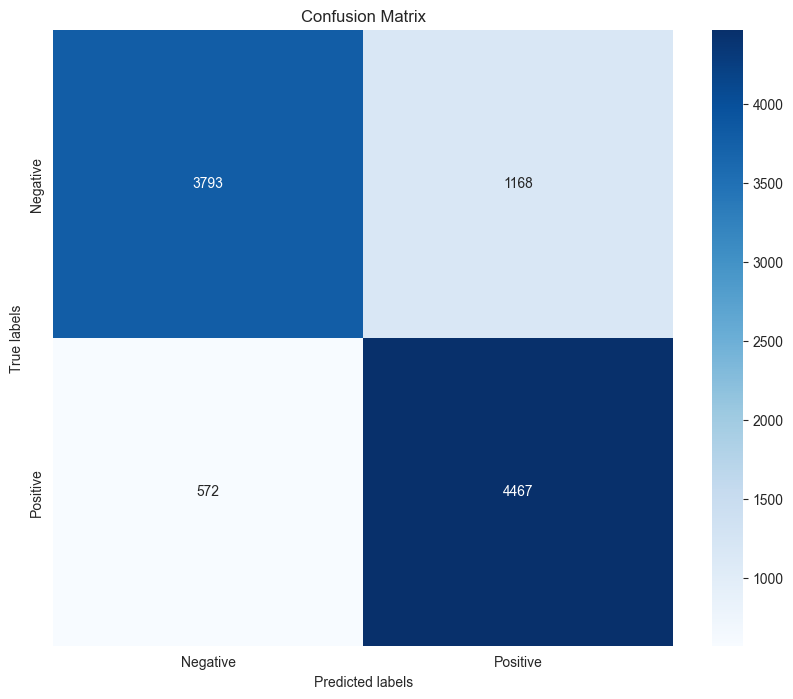

In [147]:
from sklearn.metrics import confusion_matrix
class_labels = ['Negative', 'Positive']
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred > 0.5)
CR=confusion_matrix(y_test, y_pred)
# Create confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(CR, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [148]:
cnn_model.save('Models/CNN_SentimentAnalysisModel.keras')

In [0]:
lstm_model.save('Models/LSTM_SentimentAnalysisModel.keras')
